# Confidence metrics plotting for AlphaFold + EVcouplings predictions
- Make charts that show average pLDDT, pTM with increasing number of ald chains in complex
- Make a bar chart that shows how the proportion of satisfied (<5-8 Angstrom) multimeric couplings increases going from monomer to hexamer, suggesting that a CONFIDENT Alphafold prediction need not be complete, and that satisfying couplings can help to build a more complete model

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import pandas as pd
import numpy as np
import string

# enable svg export with editable text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

def jsonload(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)  
        PAE = np.array(metrics_json['pae'])
        plddt = metrics_json['plddt']
        ptm = metrics_json['ptm']
        if "iptm" in metrics_json:
            iptm = metrics_json['iptm']
        else:
            iptm = 0
        return PAE, plddt, ptm, iptm
    
def jsonload_iptm_ptm(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)
        iptm_ptm = metrics_json["iptm+ptm"]
        return iptm_ptm

# Load metrics into an indexable dataframe

In [2]:
# path to the JSON files for alphafold prediction
folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/SpoVAA_SpoVAB/"
paths = [
    "SpoVAA_VAB_1_1/result_model_1_multimer_v2_pred_0.json",
    "SpoVAA_VAB_2_2/result_model_1_multimer_v2_pred_0.json",
    "SpoVAA_VAB_4_2/result_model_1_multimer_v2_pred_0.json",
    "SpoVAA_VAB_4_4/result_model_4_multimer_v2_pred_0.json",
    "SpoVAA_VAB_8_4/result_model_2_multimer_v2_pred_1.json"
]

PAE, plddt, ptm, iptm, name = ([None]*len(paths) for val in range(5))
metrics = pd.DataFrame({'Oligomeric state':name,"pLDDT":plddt,"pTM":ptm,'ipTM':iptm,"PAE": PAE}) # save numpy arrays in dataframe

for i in range(len(paths)):
    inpath = folder+paths[i]
    metrics['PAE'][i], metrics['pLDDT'][i], metrics['pTM'][i], metrics['ipTM'][i] = jsonload(inpath)
    metrics['Oligomeric state'][i] = \
    ':'.join(paths[i].split('/')[0].split('_')[2:4]) # give oligomeric state information in dataframe
    
metrics = metrics.set_index('Oligomeric state')

folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/SpoVAA_SpoVAB/"
paths = [
    "SpoVAA_VAB_1_1/ranking_debug.json",
    "SpoVAA_VAB_2_2/ranking_debug.json",
    "SpoVAA_VAB_4_2/ranking_debug.json",
    "SpoVAA_VAB_4_4/ranking_debug.json",
    "SpoVAA_VAB_8_4/ranking_debug.json"
]

ptm_iptm, best_ptm_iptm, mean_ptm_iptm, std_mean_ptm_iptm, name = ([None]*(len(paths)+1) for val in range(5))
metrics_ptm_iptm = pd.DataFrame({'Oligomeric state':name,'ipTM+pTM':ptm_iptm, 'Highest ipTM+pTM':best_ptm_iptm, 'Average ipTM+pTM':mean_ptm_iptm, 'Standard error ipTM+pTM':std_mean_ptm_iptm}) # save numpy arrays in dataframe
   
# complexes 
for i in range(len(paths)):
    inpath = folder+paths[i]
    i = i + 1
    dict_vals = jsonload_iptm_ptm(inpath)
    metrics_ptm_iptm ['ipTM+pTM'][i]=list(dict_vals.values())
    metrics_ptm_iptm ['Highest ipTM+pTM'][i]=max(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Average ipTM+pTM'][i]=np.mean(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Standard error ipTM+pTM'][i]=np.std(metrics_ptm_iptm ['ipTM+pTM'][i],ddof=1)
    metrics_ptm_iptm ['Oligomeric state'][i] = \
    ':'.join(paths[i-1].split('/')[0].split('_')[2:4]) # give oligomeric state information in dataframe
    
metrics_ptm_iptm = metrics_ptm_iptm.set_index('Oligomeric state')
metrics = metrics.join(metrics_ptm_iptm.iloc[:,0:5])
metrics

,pLDDT,pTM,ipTM,PAE,ipTM+pTM,Highest ipTM+pTM,Average ipTM+pTM,Standard error ipTM+pTM
Oligomeric state,,,,,,,,
1:1,"[49.8, 65.27, 83.54, 88.85, 92.48, 94.69, 94.7...",0.782821,0.859843,"[[0.75, 1.97, 4.62, 7.44, 8.83, 14.08, 16.58, ...","[0.8444386734697478, 0.8404440799731574, 0.836...",0.844439,0.78588,0.031849
2:2,"[50.47, 64.43, 83.29, 87.46, 91.21, 93.16, 93....",0.825165,0.825436,"[[0.75, 1.92, 4.63, 6.97, 8.78, 12.82, 15.84, ...","[0.8253815154325304, 0.8134918528754632, 0.806...",0.825382,0.697174,0.105931
4:2,"[54.15, 63.5, 82.14, 87.3, 92.01, 94.68, 95.29...",0.899016,0.894513,"[[0.75, 1.89, 4.39, 6.3, 8.64, 11.3, 13.95, 18...","[0.8954133277759542, 0.8866446086214625, 0.891...",0.895413,0.850591,0.046089
4:4,"[44.23, 56.03, 74.69, 80.75, 88.86, 91.8, 93.6...",0.718925,0.724026,"[[0.75, 1.92, 4.3, 7.03, 9.46, 12.42, 14.72, 2...","[0.5459133212964252, 0.5186016972294903, 0.554...",0.723006,0.59186,0.092401
8:4,"[30.63, 39.54, 54.19, 53.43, 64.8, 52.7, 65.38...",0.595096,0.571769,"[[0.75, 2.08, 4.61, 6.41, 8.79, 11.59, 13.59, ...","[0.440973040474598, 0.4198442314173051, 0.4182...",0.576434,0.447451,0.071026


# Plot the metrics

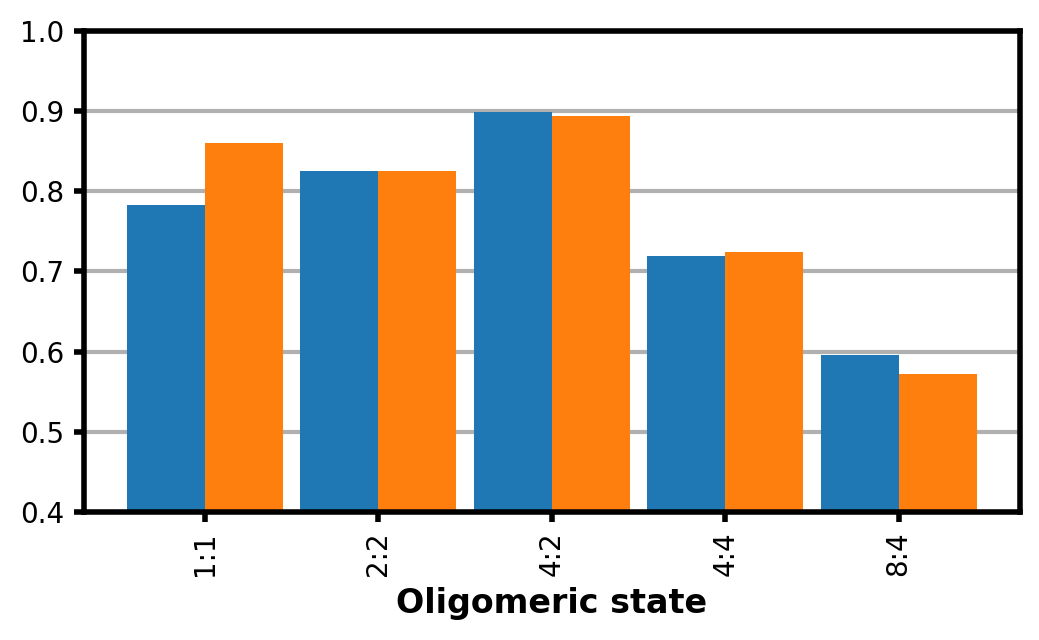

In [9]:
ax = metrics[['pTM','ipTM']].plot.bar(rot = 90, width = 0.9)
fig = plt.gcf()

fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

ax.yaxis.grid(True, which='major', linewidth = 1.5)

plt.ylim((.4, 1.0))

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
ax.get_legend().remove()

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [10]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pTM+ipTM (weighted) of all models

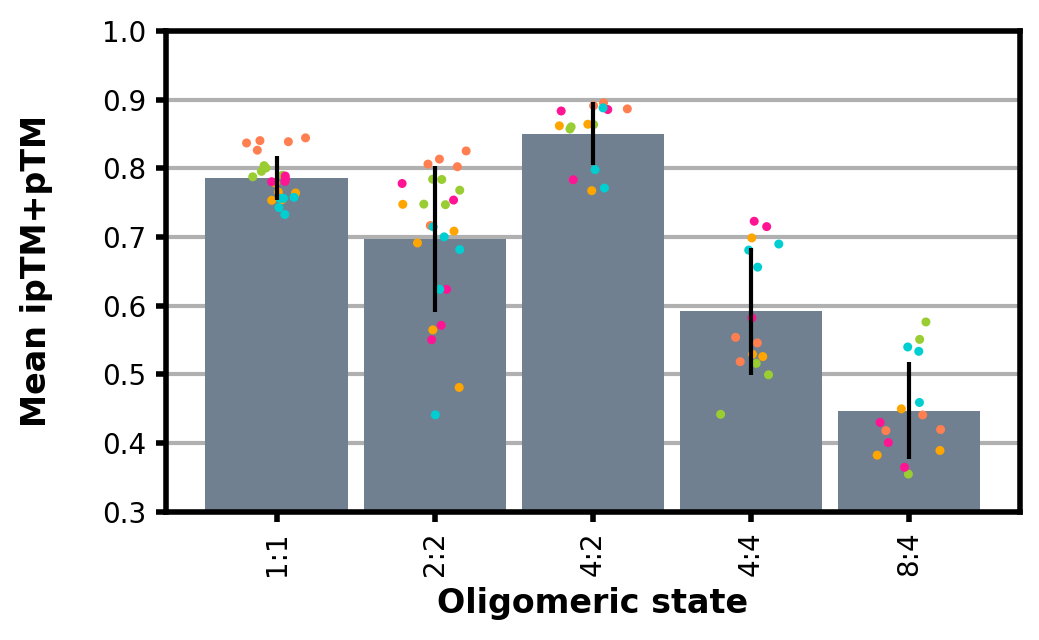

In [15]:
ax = metrics['Average ipTM+pTM'].plot(kind='bar', yerr=metrics['Standard error ipTM+pTM'], rot = 90, width = 0.9, facecolor = 'slategray', label='_nolegend_')
fig = plt.gcf()

col_list_1 = ['coral','yellowgreen','orange','deeppink','darkturquoise']
col_list_2 = np.repeat(col_list_1,3)
col_list_3 = np.repeat(col_list_1,5)
    
fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.yaxis.grid(True, which='major', linewidth = 1.5)

i = 0
for iptm_list in metrics['ipTM+pTM'].tolist():
    pos = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    displacement = np.random.default_rng().normal(size=len(iptm_list))/10
    
    if len(iptm_list) == 5: # color by model
        col_list = col_list_1
    if len(iptm_list) == 15:
        col_list = col_list_2
    if len(iptm_list) == 25:
        col_list = col_list_3
    
    ax.scatter([pos+displacement],iptm_list, s=5, facecolor=col_list)
    i = i+1
    
# hack to add labels to legend
modl = 1
for col in col_list_1:
    ax.scatter(-100,-100, s=5, facecolor=col, label='Model '+str(modl))
    modl = modl + 1

plt.ylabel('Mean ipTM+pTM\n', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

plt.ylim((0.3, 1.0))

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) # using a size in points

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [16]:
# save 
outpath = outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_multimer_ipTM+pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pLDDT per residue

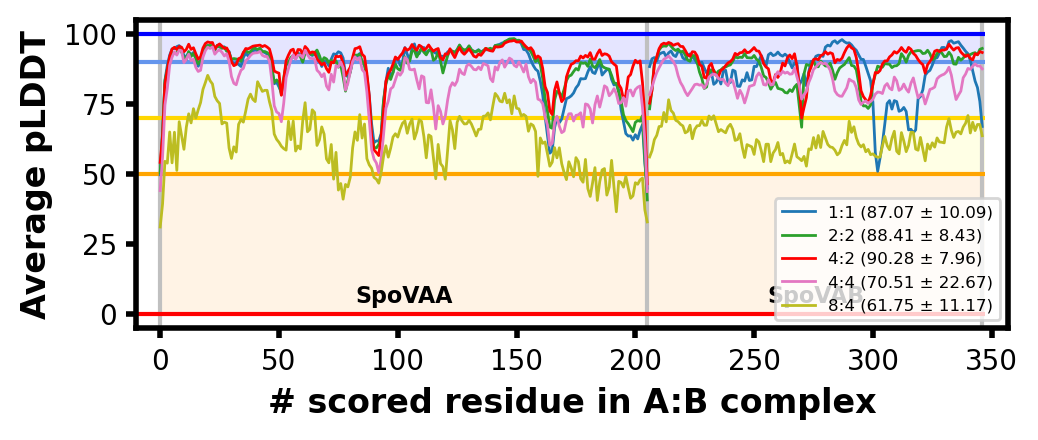

In [25]:
prot = [206,141] #length of proteins as list
names = ['SpoVAA','SpoVAB']
numberA = [1,2,4,4,8]
numberB = [1,2,2,4,4]

colors = plt.cm.tab10(np.linspace(0,1,6))
colors[2] = [1, 0, 0, 1]

# make a list of chain boundaries (start and end points)
start_chain = [0]+np.cumsum(prot).tolist()[:-1]
end_chain = (np.cumsum(prot)-1).tolist()

fig, ax = plt.subplots()
fig.set_size_inches(5,2)
fig.set_dpi(200)

plt.vlines([0]+end_chain,-5,105, linestyle='-', 
           linewidth=1.5, color='silver') #plot boundaries for chains
plt.hlines([0,50,70,90,100],-10,sum(prot), linestyle='-', 
           linewidth=1.5, color=['red','orange','gold','cornflowerblue','blue']) #plot boundaries for pLDDT

ax.add_patch(ptch.Rectangle((0,90),sum(prot),10, facecolor = 'blue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,70),sum(prot),20, facecolor = 'cornflowerblue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,50),sum(prot),20, facecolor = 'yellow', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,0),sum(prot),50, facecolor = 'darkorange', alpha = 0.1))

idx = 0
for i, row in metrics.iterrows():
    
    #get global average
    seq = row['pLDDT'][0:prot[0]*numberA[idx]+prot[1]*numberB[idx]]  
    av_plddt = np.mean(seq)
    std_plddt = np.std(seq)
    plddt_string = f"({av_plddt:.2f} ± {std_plddt:.2f})"
    
    # plot averages of A chain
    seq = row['pLDDT'][0:prot[0]*numberA[idx]]   
    split_plddt = np.array_split(seq,numberA[idx])
    local_av_plddt = np.mean(split_plddt, axis = 0)
    ax.plot(range(0,prot[0]), local_av_plddt, linewidth=1, label = i+' '+plddt_string, color = colors[idx])
    
    # plot average of B chain
    seq = row['pLDDT'][prot[0]:prot[0]+prot[1]*numberB[idx]]
    split_plddt = np.array_split(seq,numberB[idx])
    local_av_plddt = np.mean(split_plddt, axis = 0)
    ax.plot(range(prot[0],prot[0]+prot[1]), local_av_plddt, linewidth=1, color = colors[idx])
    
    idx = idx+1

# chain names on axis between start / end chain points
for s,e,n in zip(start_chain, end_chain, names):
    plt.text((s+e)/2, 4, n, ha='center', color='k',weight='bold', size=8)
    
plt.xlabel('# scored residue in A:B complex', fontweight = 'bold')
plt.ylabel('Average pLDDT', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

plt.ylim((-5,105))
plt.xlim((-10, sum(prot)+10))

legend = plt.legend(fontsize = 6)

plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [26]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_pLDDT_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# pLDDT distribution

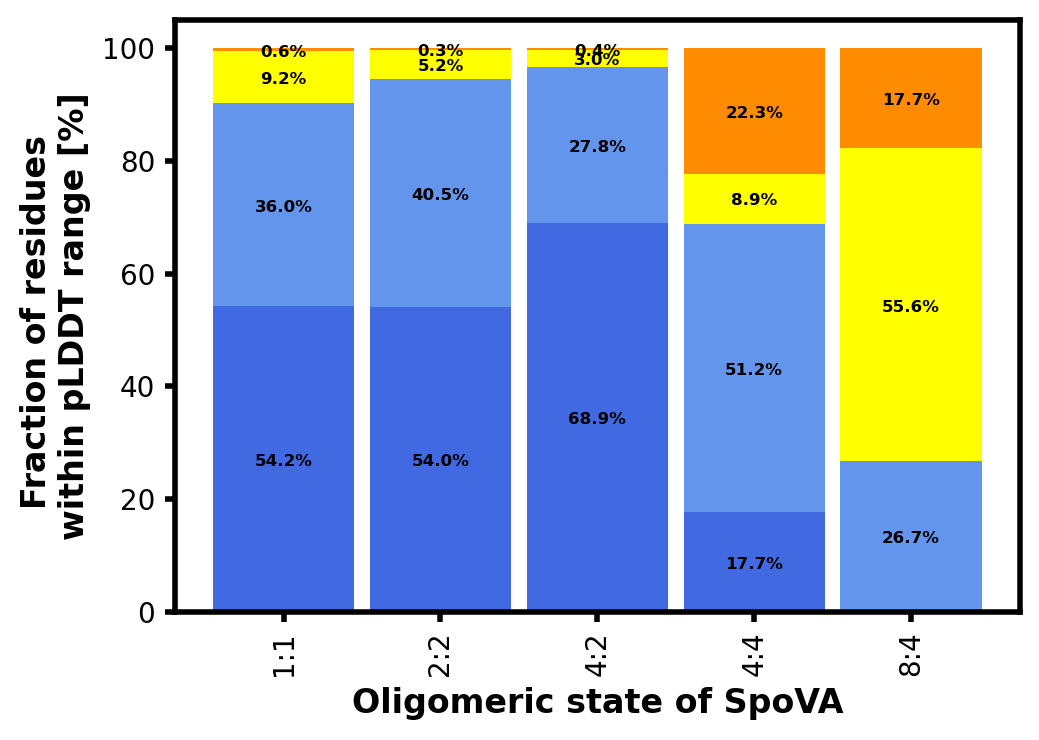

In [28]:
lengths = [206,141] #length of protein
names = ['SpoVAA','SpoVAB']
width = 0.9

labels = metrics.index.tolist()

fig, ax = plt.subplots()
fig.set_size_inches(5,3.5)
fig.set_dpi(200)

idx = 0
vhigh = np.zeros(5)
high = np.zeros(5)
caution = np.zeros(5)
low = np.zeros(5)

for i, row in metrics.iterrows():
    # get plddt from all chains
    r = np.array(row['pLDDT'])
    
    length = len(r)
    
    # get the number of residues with a certain pLDDT
    vhigh[idx]=sum(r>=90)
    high[idx]=sum((r<90) & (r>=70))
    caution[idx]=sum((r<70) & (r>=50))
    low[idx]=sum(r<50)
    
    vhigh[idx] = 100*vhigh[idx]/length
    high[idx] = 100*high[idx]/length
    caution[idx] = 100*caution[idx]/length
    low[idx] = 100*low[idx]/length
    idx = idx+1
    
# plot bar charts
ax.bar(labels, vhigh, width = width, color = "royalblue", label = 'pLDDT ≥ 90')
ax.bar(labels, high, bottom = vhigh, width = width, color = "cornflowerblue", label = '70 ≤ pLDDT < 90')
ax.bar(labels, caution, bottom = vhigh+high, width = width, color = "yellow", label = '50 ≤ pLDDT < 70')
ax.bar(labels, low, bottom = vhigh+high+caution, width = width, color = "darkorange", label = 'pLDDT < 50')

for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y()- 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=6
    )
    
plt.xlabel('Oligomeric state of SpoVA', fontweight = 'bold')
plt.ylabel('Fraction of residues \nwithin pLDDT range [%]', fontweight = 'bold')

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#legend = plt.legend(fontsize = 8, 
#                    loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [29]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_pLDDT_distribution_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# PAE in a grid

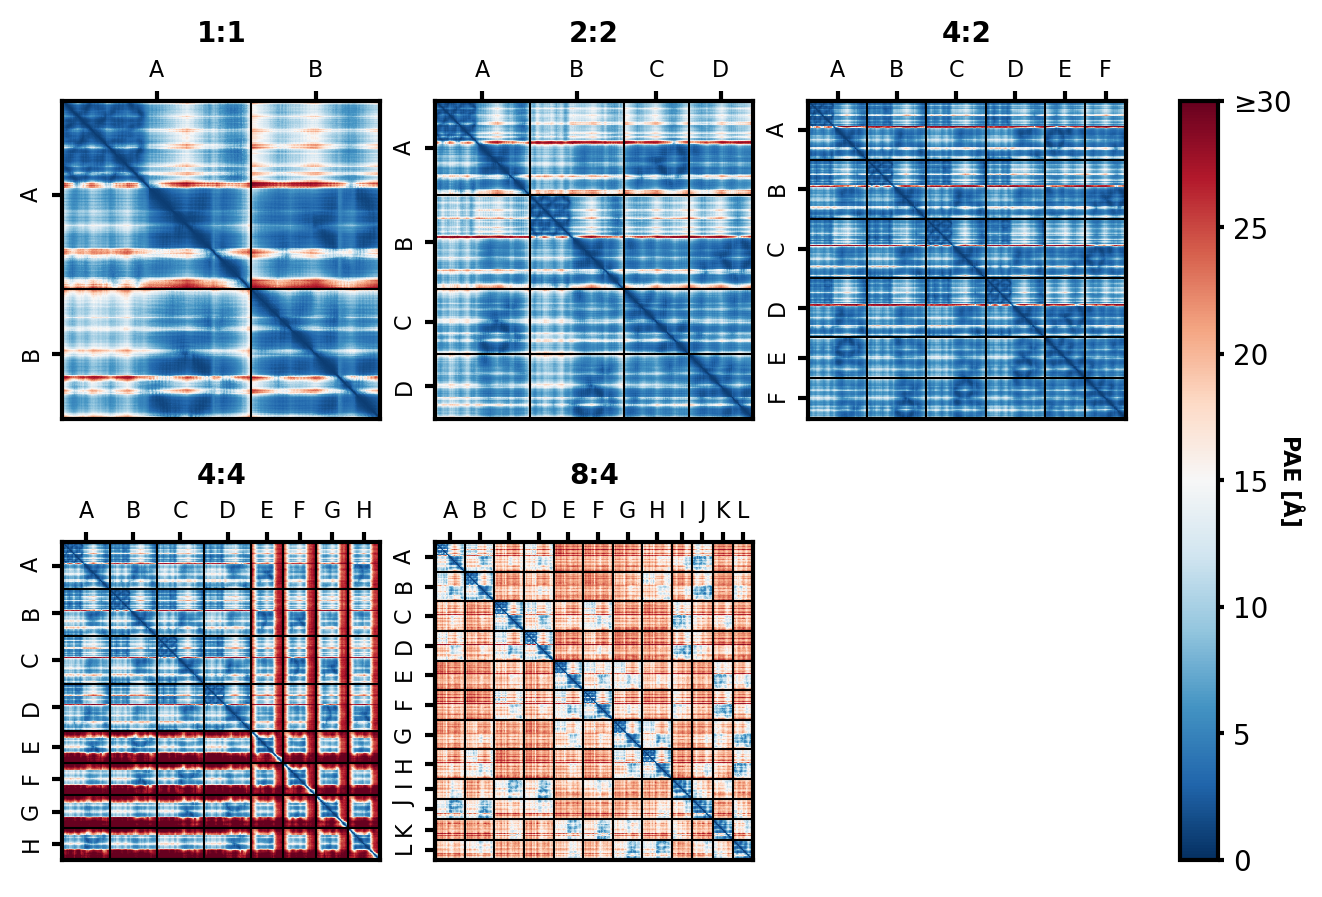

In [13]:
# get PAE and oligomeric state from metrics dataframe
PAE = metrics['PAE']
state = PAE.index.tolist()

prot = np.array([206,141]) #length of proteins
names = ['SpoVAA','SpoVAB']
numberA = [1,2,4,4,8]
numberB = [1,2,2,4,4]
chainnames = list(string.ascii_uppercase) #iterable list of chain IDs

fig, axes = plt.subplots(2,3, constrained_layout=True) #make 2x4 axis grid stored within 2-dimensional array
fig.set_size_inches(6.5,4.5)
fig.set_dpi(200)

i = 0
for idx_ax, ax in np.ndenumerate(axes): # iterate over all axes in array

    if idx_ax == (1,2): # skip the loop for the very last plot which has no PAE data to prevent errors
        break
    
    # make a list of chain boundaries by repeating the lengths of each protein and adding up
    rep_mat = np.array([
            numberA[i],numberB[i]
                       ])
    chains = np.repeat(prot,rep_mat)
    borders = np.cumsum(chains).tolist()
    
    # define axis limits by amino acid length of protein
    length = sum(chains)
    tick_pos = (np.concatenate((np.zeros(1),borders[:-1])) + borders) / 2 # get middle point between chain borders to put labels   
        
    ax.set_box_aspect(1) # set to square aspect ratio
    
    mesh = ax.pcolormesh(PAE[i], vmin = 0, vmax = 30, cmap='RdBu_r') #make colored matrix with per-residue PAE color scaling
    
    ax.hlines(borders, 0, length, colors = 'k', linewidth = .75) # plot borders of Ald chains
    ax.vlines(borders, 0, length, colors = 'k', linewidth = .75) 
    
    # set axis labels
    ax.xaxis.tick_top() # for clarity, put on top
    ax.xaxis.set_label_position('top') 
    ax.invert_yaxis() # top left needs to map to residue 1<->1, invert
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.tick_params(width=1.5)
    
    ax.set_title(state[i], fontsize = 10, fontweight = 'bold') # set oligomeric state as axis title
    
    # set x/y-ticks to positions between Ald borders, set to respective chain name
    ax.set_xticks(tick_pos, labels = chainnames[0:sum(rep_mat)], fontsize = 8)
    ax.set_yticks(tick_pos, labels = chainnames[0:sum(rep_mat)], fontsize = 8, rotation=90)
    
    i = i + 1 # count up in list

#add colorbar next to subplot grid
cb = fig.colorbar(mesh, ax=axes, orientation='vertical')
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(size = 2, width = 1.5)

#label colorbar
cb.ax.yaxis.set_ticks([0,5,10,15,20,25,30],labels = ['0','5','10','15','20','25','≥30'])
cb.ax.set_ylabel('PAE [Å]', rotation=270, fontsize = 8, fontweight = 'bold')

axes[1,2].remove() #delete the last empty plot

#padding
fig.set_constrained_layout_pads(w_pad=0./72., h_pad=8./72.,
            hspace=0./72., wspace=0./72.)

plt.show()

In [14]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_PAE_all"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)

# Couplings with increasing multimerization state (TODO formatting)

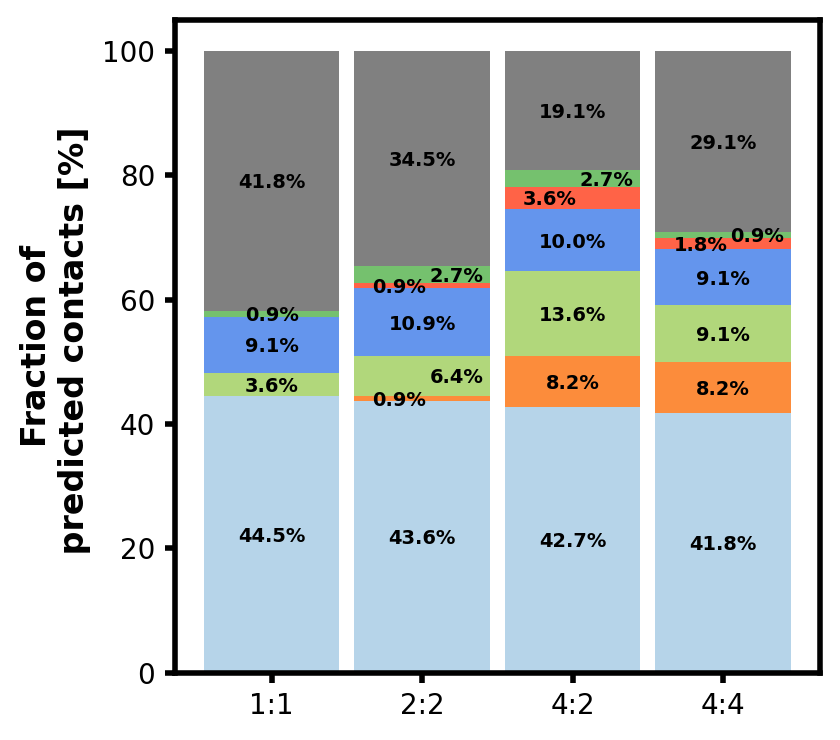

In [59]:
labels = metrics.index.tolist()
labels = labels[0:4] #exclude 8:8

# manually insert the coupling data and express as percentages
# ([1:1 A+B+A-B, \
#  2:2 A+B+A-B, \
#  4:2 A+B+A-B, \
#  4:4 A+B+A-B]) / total number of couplings * 100 [%]

intra_close = np.array([41+8,
                        41+7,
                        41+6,
                        41+5])/110*100
intra_far = np.array([7+3,
                      8+4,
                      6+5,
                      5+5])/110*100
inter_close = np.array([0,
                        0+1,
                        9+0,
                        9+0])/110*100
inter_far = np.array([0,
                      0+1,
                      2+2,
                      2+0])/110*100
inter_complex_close = np.array([4,
                                7,
                                15,
                                10])/110*100
inter_complex_far = np.array([1,
                              3,
                              3,
                              1])/110*100
unsatisfied = np.array([20+12+14,
                        19+10+9,
                        10+10+1,
                        11+8+13])/110*100

labellist = ('Intra-chain, <5Å',
             'Homomeric, <5Å',
             'Heteromeric, <5Å',
             'Intra-chain, 5-8Å',
             'Homomeric, 5-8Å',
             'Heteromeric, 5-8Å',
             '>8Å')

width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, intra_close, width = width, color = "#B6D4E9")
ax.bar(labels, inter_close, bottom = intra_close, width = width, color = "#FC8C3B")
ax.bar(labels, inter_complex_close, bottom = intra_close+inter_close, width = width, color = "#B1D77B")
ax.bar(labels, intra_far, bottom = intra_close+inter_close+inter_complex_close, width = width, color = "#6495ED")
ax.bar(labels, inter_far, bottom = intra_close+inter_close+inter_complex_close+intra_far, width = width, color = "tomato")
ax.bar(labels, inter_complex_far, bottom = intra_close+inter_close+inter_complex_close+intra_far+inter_far, width = width, color = "#75C16E")
ax.bar(labels, unsatisfied, bottom = intra_close+inter_close+inter_complex_close+intra_far+inter_far+inter_complex_far, width = width, color = "grey")

offsetlist = [
    2, 2, 2, 2,
    2, 3, 2, 2,
    2, 1.33, 2, 2,
    2, 2, 2, 2,
    2, 3, 3, 3,
    2, 1.33, 1.33, 1.33,
    2, 2, 2, 2
]


# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for offset,bar in zip(offsetlist,ax.patches):
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / offset,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Fraction of\n predicted contacts [%]', fontsize = 12, fontweight = 'bold')

ax.xaxis.label.set_fontweight('bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
plt.ylim([0, 105])

# Put a legend to the right of the current axis
#legend = plt.legend(labellist, title="456 total couplings per\nGerAA chain, P>0.9", fontsize = 5, \
#                    loc='center left', bbox_to_anchor=(1, 0.5),
#                   title_fontproperties={'weight':'bold', 'size':10})
#legend.get_title().set_fontsize('5') #legend 'Title' fontsize

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [60]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_channel_coupling_fractions_adjusted" #no file ending!

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

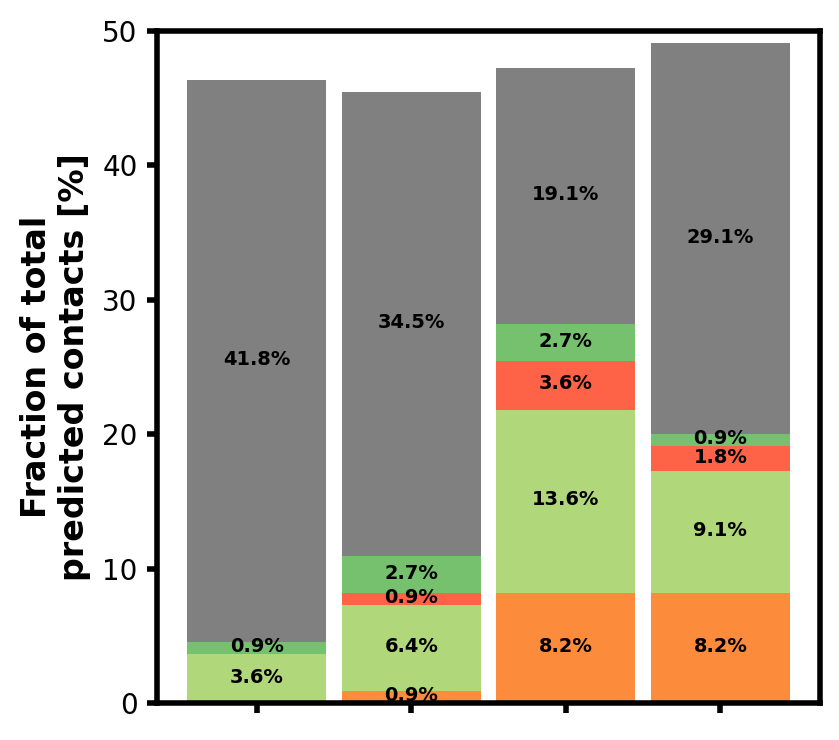

In [64]:
width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, inter_close, width = width, color = "#FC8C3B")
ax.bar(labels, inter_complex_close, bottom = inter_close, width = width, color = "#B1D77B")
ax.bar(labels, inter_far, bottom = inter_close+inter_complex_close, width = width, color = "tomato")
ax.bar(labels, inter_complex_far, bottom = inter_close+inter_complex_close+inter_far, width = width, color = "#75C16E")
ax.bar(labels, unsatisfied, bottom = inter_complex_far+inter_close+inter_complex_close+inter_far, width = width, color = "grey")

plt.ylim([0, 50])

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 0.3,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Fraction of total\npredicted contacts [%]', fontsize = 12, fontweight = 'bold')
ax.xaxis.label.set_fontweight('bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

ax.set_xticklabels([])

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [65]:
# save the plot and coupling data
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/spoVAAB_multimer/Plots"
filename = "spoVAAB_coupling_fractions_intermolecular_adjusted" #enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)